# FMA Song genre prediction

# Read in the data

Read in the song metadata as a pandas data frame.

In [1]:
import pandas as pd

tracks = pd.read_csv('./fma-rock-vs-hiphop.csv')
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
track_id         17734 non-null int64
bit_rate         17734 non-null int64
comments         17734 non-null int64
composer         166 non-null object
date_created     17734 non-null object
date_recorded    1898 non-null object
duration         17734 non-null int64
favorites        17734 non-null int64
genre_top        17734 non-null object
genres           17734 non-null object
genres_all       17734 non-null object
information      482 non-null object
interest         17734 non-null int64
language_code    4089 non-null object
license          17714 non-null object
listens          17734 non-null int64
lyricist         53 non-null object
number           17734 non-null int64
publisher        52 non-null object
tags             17734 non-null object
title            17734 non-null object
dtypes: int64(8), object(13)
memory usage: 2.8+ MB


In [2]:
# Students will remove NAs here

# Read in the track metric data

Read in the song metrics as a separate data frame. 

In [3]:
# track_metrics = pd.read_csv('./echonest-clean.csv')
track_metrics = pd.read_json('./echonest-clean.json', precise_float=True)
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 9 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
track_id            13129 non-null int64
valence             13129 non-null float64
dtypes: float64(8), int64(1)
memory usage: 923.2 KB


## Merge data frames

Merge the two data frames together using the `track_id` column as the row identifier.

In [12]:
echo_tracks = pd.merge(track_metrics, tracks[['genre_top', 'title', 'track_id']], on='track_id')
echo_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence,genre_top,title
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,2,0.576661,Hip-Hop,Food
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,3,0.269240,Hip-Hop,Electric Ave
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,5,0.621661,Hip-Hop,This World
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,134,0.894072,Hip-Hop,Street Music
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,153,0.034018,Rock,Hundred-Year Flood


In [13]:
# Students will make a correlation matrix to explore if there are correlated variables

## PCA and visualization

Possibly the variance between genres could be explained largely by just a few variables in the data set. To find these, a commonly used dimensionality reduction approach is Principal Component Analysis (PCA), which rotates the data along the axis of highest variance and allows for visualization in lower dimensions.

First preprocess the data by assigning all numerical features into the `features` variable and the genres into the `labels` variable.

Use PCA to find out the intrinsic number of dimensions for the data, and visualize the results in a bar plot with the explained variance on the y-axis.

<BarContainer object of 8 artists>

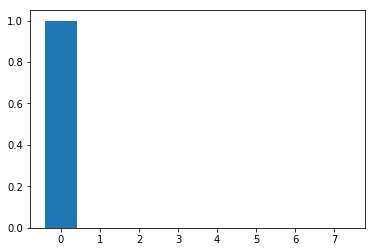

In [14]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = echo_tracks.drop(['genre_top', 'title', 'track_id'], axis=1) 
labels = echo_tracks['genre_top']

pca = PCA()
pca.fit(features)

fig, ax = plt.subplots()
x = range(len(pca.explained_variance_))
y = pca.explained_variance_ratio_
ax.bar(x, y)

The variance in the data seems to be almost exclusively explained by just a single variable... Remember that PCA uses the *absolute* variance of the variable to rotate the data. Explore what the variance is for the different columns, perform a suitable scaling of the data if needed, and plot the result in a scree plot as above.

acousticness           0.135527
danceability           0.033673
energy                 0.059561
instrumentalness       0.141743
liveness               0.022669
speechiness            0.021297
tempo               1156.168148
valence                0.071093
dtype: float64


<BarContainer object of 8 artists>

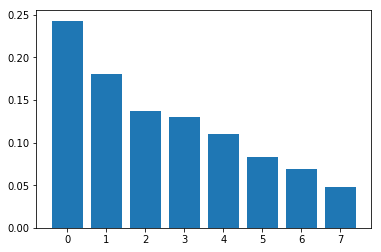

In [15]:
feature_variance = features.var()
print(feature_variance)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

pca = PCA()
pca.fit(scaled_train_features)

fig, ax = plt.subplots()
x = range(len(pca.explained_variance_))
y = pca.explained_variance_ratio_
ax.bar(x, y)

Unfortunately, there does not appear to be a clear elbow point in this plot, so it is not straightforward to find the number of intrinsic dimensions for this data. However, we can still visualize the data using the top 2 PCs. 

In [16]:
# Students will visualize the data in two dimensions with a scatter plot.

## Compare the predictive power of logistic regression and a decision tree

After using PCA to visualize and qualitatively inspect the data, it is now time to make quantitative predictions about the genres of the missing songs. There are many algorithm that could perform well on this type of task. Here, we will try a couple of common algorithms.

The first algorithm will be a decision tree. Start by splitting the data into a train and test set, and then train a decision tree classifier on the training data.

In [10]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=10)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
tree.score(test_features, test_labels)

0.8692756036636137

In [11]:
# Students will do the same with a logistic regression classifier and compare the 
# results using a classification report and also experience the pitfalls of learning
# on unbalanced data.